#### https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

#### https://www.kaggle.com/datasets/geomack/spotifyclassification

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spotify_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True) 

In [4]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## Data Cleaning

In [5]:
df.shape

(2017, 16)

In [7]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [8]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [9]:
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

## Data Analysis

### Top 10 most popular artists

In [14]:
top_10 = df.groupby("artist").count().sort_values(by='song_title', ascending=False)['song_title'][:10]

In [15]:
top_10

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
FIDLAR              9
Crystal Castles     9
*NSYNC              8
Fall Out Boy        8
Michael Jackson     8
Name: song_title, dtype: int64

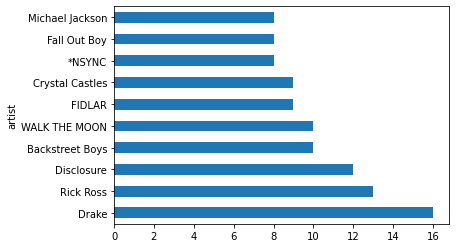

In [16]:
top_10.plot.barh()
plt.show()

### Top 5 longest tracks

In [63]:
top_5_long = df[['duration_ms', 'song_title']].sort_values(by='duration_ms', ascending=False)[:5]

In [64]:
top_5_long['duration_ms'] = top_5_long['duration_ms']/1000/60

In [65]:
top_5_long.rename(columns={'duration_ms': 'duration'}, inplace=True)

In [66]:
top_5_long

,duration,song_title
1535,16.743783,The Nearness of You
695,14.166000,Music Is the Answer - Original Extended 12-Inc...
819,13.750450,Southern Man - Live
1603,13.066883,Viola Sonata in C Minor: III. Andante con vari...
1565,12.724450,Gloomy Sunday


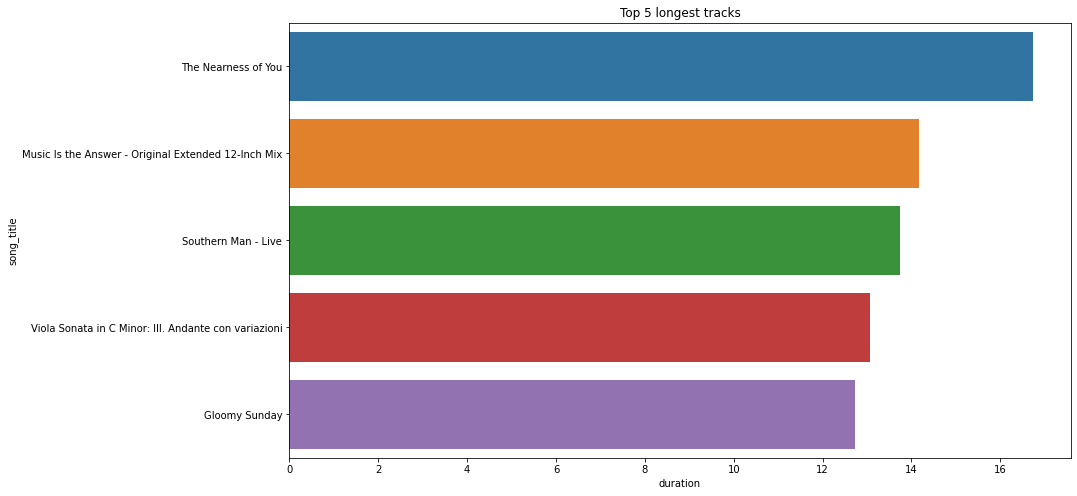

In [68]:
plt.figure(figsize=(14, 8))
sns.barplot(x='duration', y='song_title', data=top_5_long)
plt.title('Top 5 longest tracks')
plt.show()

### Multiple feature plots

In [17]:
cols = ['tempo', 'loudness', 'danceability', 'energy', 'valence']


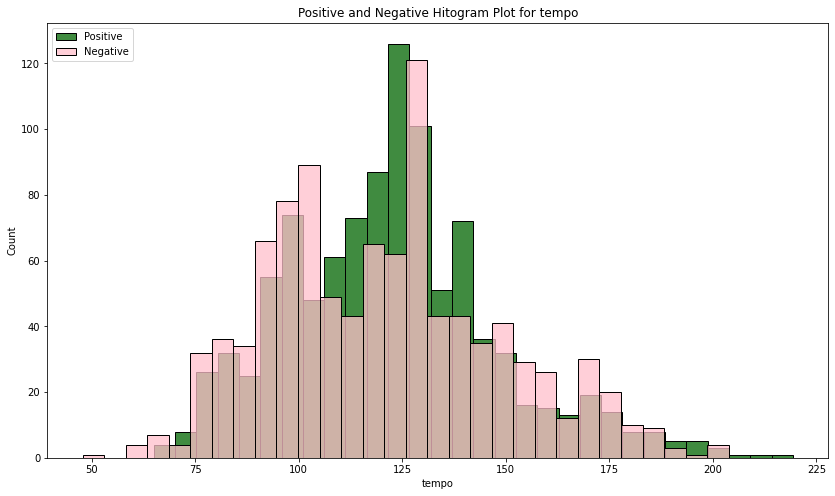

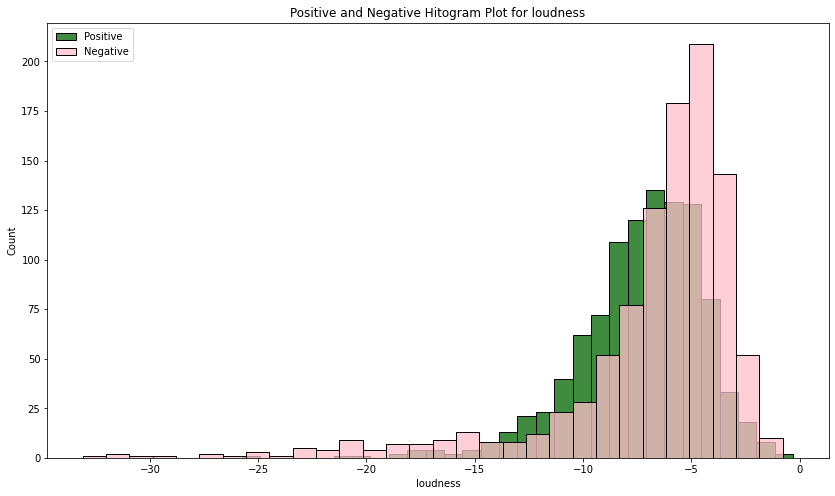

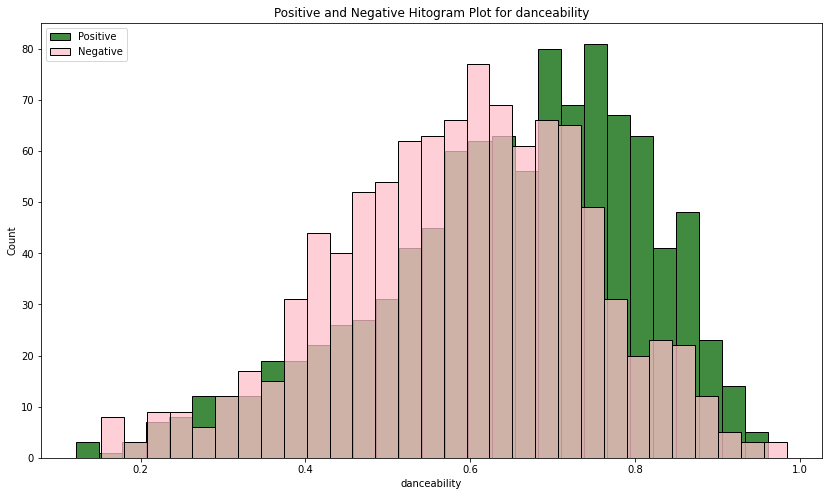

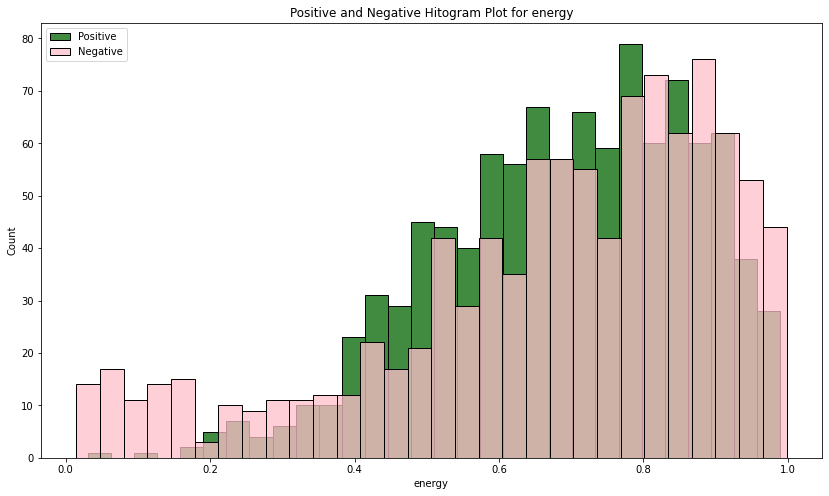

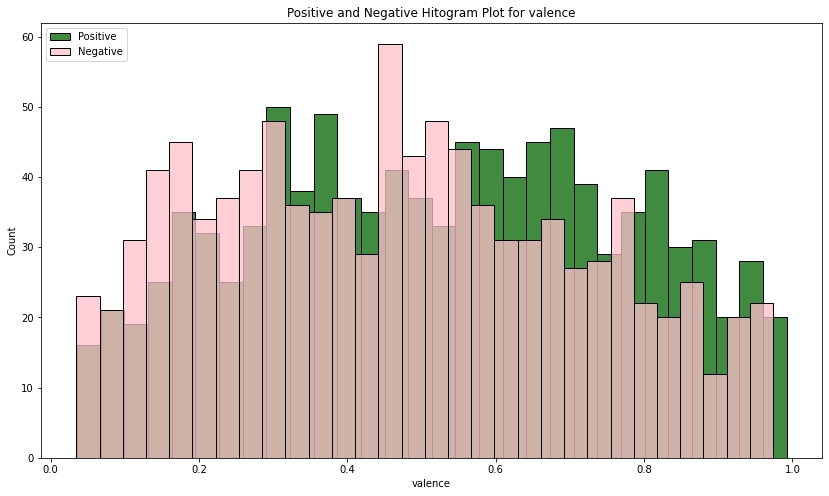

In [33]:
for col in cols:
    positive_data = df[df["target"] == 1][col]
    negative_data = df[df["target"] == 0][col]
    
    plt.figure(figsize=(14, 8))
    
    sns.histplot(positive_data, bins=30, label='Positive', color='darkgreen')
    sns.histplot(negative_data, bins=30, label='Negative', color='pink')
    
    plt.legend(loc='upper left')
    plt.title(f'Positive and Negative Hitogram Plot for {col}')
    plt.show()